Dataset Preview:
         *PCF-ID  Year of reporting *Stage-level CO2e available  \
0  10056-1-2014               2014                         Yes   
1  10056-1-2015               2015                         Yes   
2  10222-1-2013               2013                         Yes   
3  10261-1-2017               2017                         Yes   
4  10261-2-2017               2017                         Yes   

                  Product name (and functional unit)  \
0                           Frosted Flakes(R) Cereal   
1  Frosted Flakes, 23 oz, produced in Lancaster, ...   
2                                       Office Chair   
3                             Multifunction Printers   
4                             Multifunction Printers   

                                      Product detail               Company  \
0  Frosted Flakes(R), 23 oz., Produced in Lancast...       Kellogg Company   
1                                             Cereal       Kellogg Company   
2             

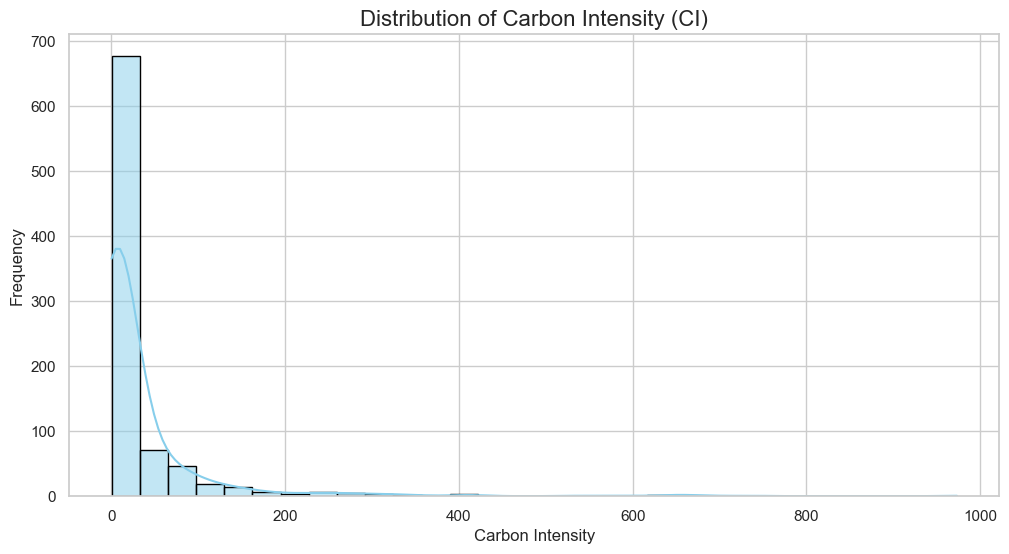


Sector Summary:
                       *Company's sector        mean   min     max  count
0              Automobiles & components   21.599867  0.99   84.36     75
1                             Chemicals    5.173017  0.12   94.00    116
2         Comm. equipm. & capital goods  106.041607  0.28  973.22     56
3                Computer, IT & telecom   75.294625  0.12  736.50    253
4   Construction & commercial materials    1.178955  0.21    6.51     67
5                       Food & Beverage    5.087266  0.11   74.64    139
6  Home durables, textiles, & equipment   13.283033  0.40  235.91    122
7          Packaging for consumer goods    1.276053  0.23    2.72     38


C:\Users\darsh\AppData\Local\Temp\ipykernel_7688\1339597769.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='*Company\'s sector', data=sector_summary.sort_values(by='mean', ascending=False),


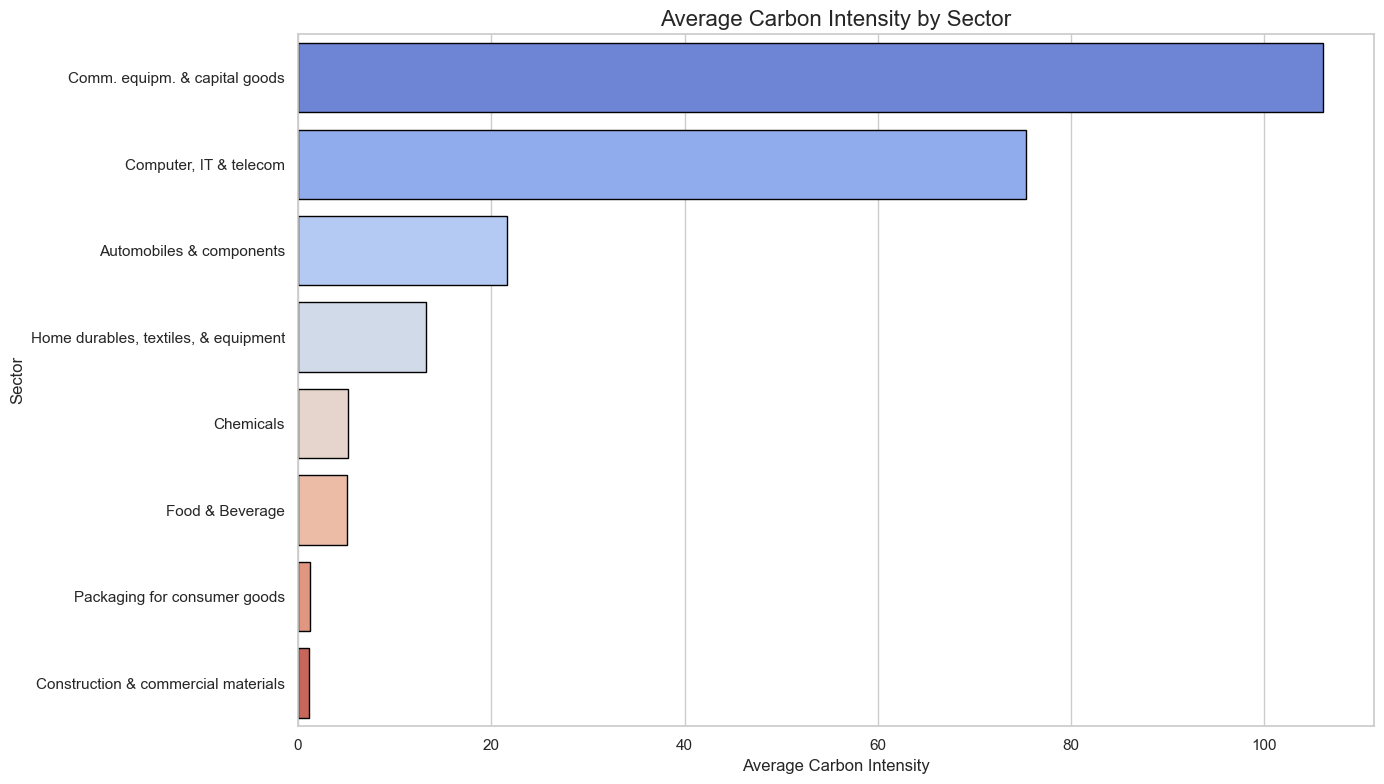


Country Summary:
    Country (where company is incorporated)  *Carbon intensity
0                                Australia          10.500000
1                                  Belgium           1.175000
2                                   Brazil         106.168235
3                                   Canada         370.148333
4                                    Chile           0.516667
5                                    China          44.586667
6                                 Colombia           0.175000
7                                  Finland           9.669714
8                                   France          60.863500
9                                  Germany          20.763582
10                                  Greece           0.700000
11                                   India           1.536250
12                               Indonesia           0.720000
13                                 Ireland           0.855000
14                                   Italy         

C:\Users\darsh\AppData\Local\Temp\ipykernel_7688\1339597769.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='*Carbon intensity', y='Country (where company is incorporated)', data=top_countries,


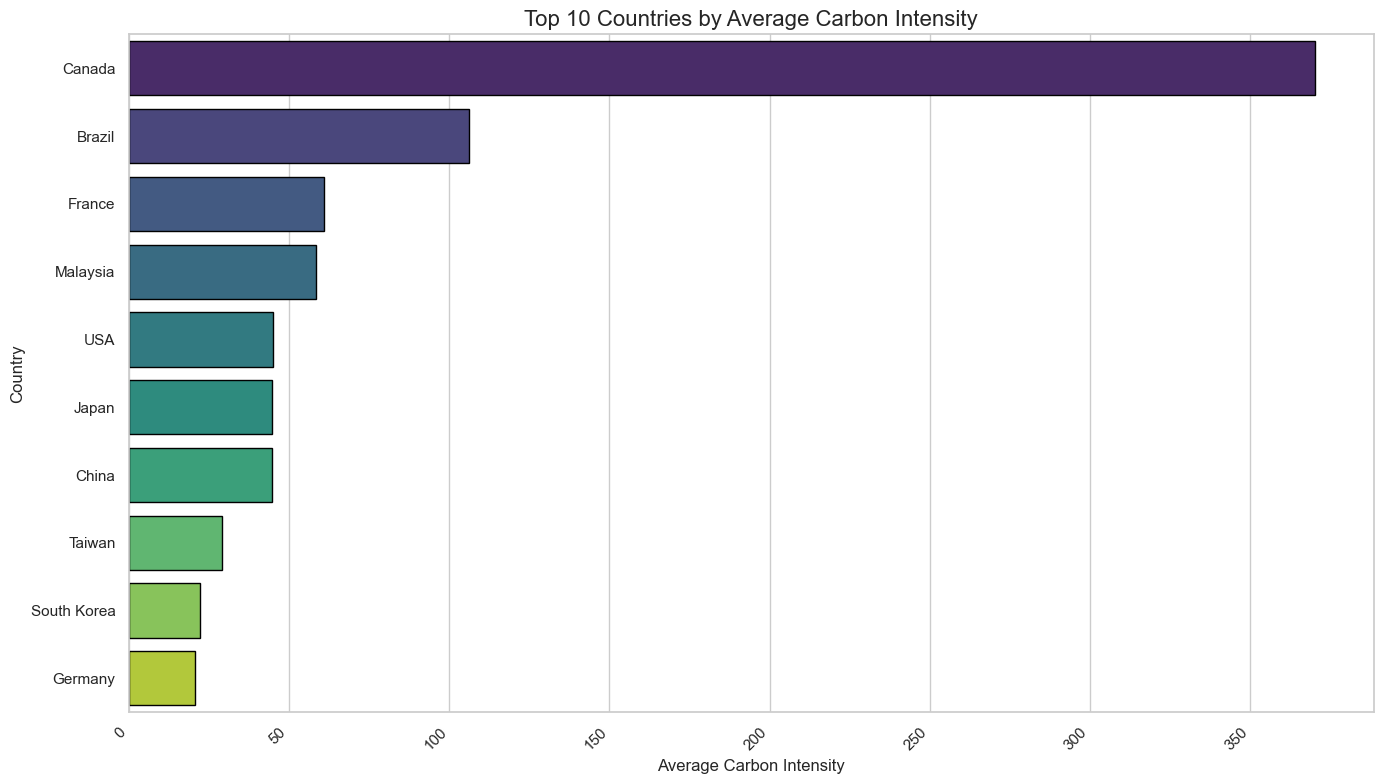

In [11]:
# Importing libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Setting a Seaborn style
sns.set_theme(style="whitegrid", palette="pastel")  # Choose a clean and colorful theme

# Load the dataset
file_path = r'CarbonCatalogueDataDescriptor.xlsx'
sheet_name = 'Product Level Data'  # Replace with the actual sheet name
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Preview the first few rows of the dataset
print("Dataset Preview:\n", data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Check data types
print("\nData Types:\n", data.dtypes)

# Remove duplicates (if any)
data = data.drop_duplicates()

# Basic statistics
print("\nBasic Statistics:\n", data.describe())

# Verify column names
print("\nColumn Names:\n", data.columns)

# Explore unique values in key columns
if '*Company\'s sector' in data.columns and '*Carbon intensity' in data.columns:
    print("\nUnique Sectors:\n", data['*Company\'s sector'].unique())
    print("\nUnique Countries:\n", data['Country (where company is incorporated)'].unique())

    # Check the distribution of carbon intensity (CI)
    plt.figure(figsize=(12, 6))
    sns.histplot(data['*Carbon intensity'].dropna(), kde=True, bins=30, color="skyblue", edgecolor="black")
    plt.title('Distribution of Carbon Intensity (CI)', fontsize=16)
    plt.xlabel('Carbon Intensity', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

    # Group by sector and calculate average, min, and max CI
    sector_summary = data.groupby('*Company\'s sector')['*Carbon intensity'].agg(['mean', 'min', 'max', 'count']).reset_index()
    print("\nSector Summary:\n", sector_summary)

    # Plot the average CI by sector
    plt.figure(figsize=(14, 8))
    sns.barplot(x='mean', y='*Company\'s sector', data=sector_summary.sort_values(by='mean', ascending=False), 
                palette='coolwarm', edgecolor="black")
    plt.title('Average Carbon Intensity by Sector', fontsize=16)
    plt.xlabel('Average Carbon Intensity', fontsize=12)
    plt.ylabel('Sector', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Group by country and calculate average CI
    country_summary = data.groupby('Country (where company is incorporated)')['*Carbon intensity'].mean().reset_index()
    print("\nCountry Summary:\n", country_summary)

    # Plot the average CI by country (top 10 countries)
    top_countries = country_summary.sort_values(by='*Carbon intensity', ascending=False).head(10)
    plt.figure(figsize=(14, 8))
    sns.barplot(x='*Carbon intensity', y='Country (where company is incorporated)', data=top_countries,
                palette='viridis', edgecolor="black")
    plt.title('Top 10 Countries by Average Carbon Intensity', fontsize=16)
    plt.xlabel('Average Carbon Intensity', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns not found in the dataset. Verify column names!")
